# Research Question
Our research question is how many goals FC Barcelona is going to score in a certain match providing its date, opponent team and whether it is a home or an away match.

# Current Form Of Data
The data is currently in the following form (The attributes we are interested in): date, home_team_api_id, away_team_api_id, home_team_goal and away_team_goal. Here is a visual example representation:

| date                | home_team_api_id | away_team_api_id | home_team_goal | away_team_goal |
| :-------------------| :--------------: | :--------------: | :------------: | :------------: |
| 2008-08-17 00:00:00 | 9987             | 9993             | 0              | 1              |
| 2015-09-23 00:00:00 | 10192            | 9931             | 4              | 3              |

# Desired Form Of Data
The desired form of data should be in the following form: date, opponent team id, barca goals and whether or it is a home or an away match. Here is a visual representation of how the data should look like:

| date      | opponent_team_id | barca_goals | home_away |
| :---------| :--------------: | :---------: | --------: |

where <strong>date</strong> is the desired year minus the min year in the data set  
<strong>opponent_team_id</strong> is the team id of the opponent team. The team_id can be found in the used dataset  
<strong>barca_goals</strong> is the number of goals scored by FC Barcelona in this match  
<strong>home_away</strong> is whether it is a home or an away match where home represents 0 and away represents 1

Here is an example of how the data could be represented

| date      | opponent_team_id | barca_goals | home_away |
| :---------| :--------------: | :---------: | --------: |
| 0         | 10281            | 6           | 0         |
| 8         | 7878             | 3           | 1         |

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

database = sqlite3.connect("database.sqlite");

# Get FC Barcelona's team_api_id
In order to get the matches where FC Barcelona was involved in we need its team_api_id.  
The table which is named <strong>team</strong> is the table we are going to use to get the team_api_id. Here is a visual example representation (Only the attributes we are interested in):

| team_api_id | team_long_name |
| :---------- | -------------: |
| 8634        | FC Barcelona   |

What we are going to do is we are going to select the teams where their team_long_name is FC Barcelona (Only FC Barcelona will be returned) then we are going to get its team_api_id


In [32]:
# Get the team_api_id of FC Barcelona
barca_df = pd.read_sql_query("SELECT * from team where team_long_name='FC Barcelona'", database)
barca_api_id = barca_df.team_api_id[0]

barca_api_id

8634

# Select only the attributes related to our research problem

We are going to reach the desired form of data by getting the home and away matches alone and then concatenating them at the end.

For the home matches we are going to get the <strong>date</strong>, <strong>away_team_api_id</strong> (which represents the opponent team so we are going to rename it as opponnent_team_id) and <strong>home_team_goal</strong> (which represents the number of goals FC Barcelona scored in the match so we are going to rename it as barca_goals).
We will also need to include the players who were participating in the match, from FCB's side.

For the away matches we are going to get the <strong>date</strong>, <strong>home_team_api_id</strong> (which represents the opponent team so we are going to rename it as opponnent_team_id) and <strong>away_team_goal</strong> (which represents the number of goals FC Barcelona scored in the match so we are going to rename it as barca_goals).
We will also need to include the players who were participating in the match, from FCB's side.

Using the where clause in SQL and barca_api_id we can get the home and away matches for FC Barcelona by searching the home_team_api_id and away_team_api_id.

In [33]:
## Select only the attributee relevant to our research question

# Concerning the matches where FC Barcelona was the home team, we need the date, and the away team (opponent)
# and the number of goals the home team (FC Barcelona) scored
# also including the players participating.
home_select_clause = "date, away_team_api_id as 'opponent_team_id', home_team_goal as 'barca_goals'"

for i in range(11):
    home_select_clause += ", home_player_X" + str(i+1) + " as 'position_X"+ str(i+1) +"'";

# Concerning the matches where FC Barcelona was the away team, we need the date, and the home team (opponent)
# and the number of goals the away team (FC Barcelona) scored
# also including the players participating.
away_select_clause = "date, home_team_api_id as 'opponent_team_id', away_team_goal as 'barca_goals'"

for i in range(11):
    away_select_clause += ", away_player_X" + str(i+1) + " as 'position_X"+ str(i+1) +"'";

# Select only the matches that FC Barcelona involved in as the home team and the away team seperately
home_where_clause = "home_team_api_id=" + str(barca_api_id)
away_where_clause = "away_team_api_id=" + str(barca_api_id)

# Putting things together

Using the <strong>SELECT</strong> and <strong>WHERE</strong> clauses we can obtain the home and away matches 

In [34]:
# return the home matches of FC Barcelona
home_matches_df = pd.read_sql_query("SELECT " + str(home_select_clause) +" from match where " + str(home_where_clause), database)
home_matches_df.head()

,date,opponent_team_id,barca_goals,position_X1,position_X2,position_X3,position_X4,position_X5,position_X6,position_X7,position_X8,position_X9,position_X10,position_X11
0,2008-11-08 00:00:00,10281,6,1,2,4,6,8,3,5,7,3,5,7
1,2008-11-23 00:00:00,8305,1,1,2,4,6,8,3,5,7,3,5,7
2,2008-12-06 00:00:00,10267,4,1,2,4,6,8,3,5,7,3,5,7
3,2008-12-13 00:00:00,8633,2,1,2,4,6,8,4,6,2,8,4,6
4,2009-01-03 00:00:00,8661,3,1,2,4,6,8,3,5,7,3,5,7


In [35]:
# return the home matches of FC Barcelona
away_matches_df = pd.read_sql_query("SELECT " + str(away_select_clause) +" from match where " + str(away_where_clause), database)
away_matches_df.head()

,date,opponent_team_id,barca_goals,position_X1,position_X2,position_X3,position_X4,position_X5,position_X6,position_X7,position_X8,position_X9,position_X10,position_X11
0,2008-08-31 00:00:00,8388,0,1,2,4,6,8,3,5,7,3,5,7
1,2008-11-16 00:00:00,8479,2,1,2,4,6,8,3,5,7,3,5,7
2,2008-11-29 00:00:00,8302,3,1,2,4,6,8,3,5,7,3,5,7
3,2008-12-21 00:00:00,10205,2,1,2,6,8,4,3,5,7,3,5,7
4,2009-01-11 00:00:00,8371,3,1,2,4,6,8,3,5,7,3,5,7


# Set the home_away attribute
Set the home_away attribute for the home and away dataframes where the home dataframe gets a value of 0 and the away dataframe gets a value of 1

In [36]:
# Create a new attribute named home_away where 0 is home and 1 is away and apply it on our two data frames
home_matches_df['home_away'] = 1
home_matches_df.head()

,date,opponent_team_id,barca_goals,position_X1,position_X2,position_X3,position_X4,position_X5,position_X6,position_X7,position_X8,position_X9,position_X10,position_X11,home_away
0,2008-11-08 00:00:00,10281,6,1,2,4,6,8,3,5,7,3,5,7,1
1,2008-11-23 00:00:00,8305,1,1,2,4,6,8,3,5,7,3,5,7,1
2,2008-12-06 00:00:00,10267,4,1,2,4,6,8,3,5,7,3,5,7,1
3,2008-12-13 00:00:00,8633,2,1,2,4,6,8,4,6,2,8,4,6,1
4,2009-01-03 00:00:00,8661,3,1,2,4,6,8,3,5,7,3,5,7,1


In [37]:
away_matches_df['home_away'] = 0
away_matches_df.head()

,date,opponent_team_id,barca_goals,position_X1,position_X2,position_X3,position_X4,position_X5,position_X6,position_X7,position_X8,position_X9,position_X10,position_X11,home_away
0,2008-08-31 00:00:00,8388,0,1,2,4,6,8,3,5,7,3,5,7,0
1,2008-11-16 00:00:00,8479,2,1,2,4,6,8,3,5,7,3,5,7,0
2,2008-11-29 00:00:00,8302,3,1,2,4,6,8,3,5,7,3,5,7,0
3,2008-12-21 00:00:00,10205,2,1,2,6,8,4,3,5,7,3,5,7,0
4,2009-01-11 00:00:00,8371,3,1,2,4,6,8,3,5,7,3,5,7,0


# Get minimum year in the dataset

In order to reach the desired form of data we need to get the minimum year in the dataset so that we can use it to manipulate the date attribute as described above. We are going to do that by returning all the dates from the dataset. We will then manipulate the it by getting the year only from date attribute. The date attribute is in the following form yyyy-mm-dd hh:mm:ss so we are going to extract the year by getting the first integer in the date attribute which is the yyyy. Then we are going to convert the string to a float and then to an integer. After we obtain the years in an integer form we can then get the minimum year.

In [38]:
# Get all the dates from the database
date_df = pd.read_sql_query("SELECT date from match", database)
date_df.head()

,date
0,2008-08-17 00:00:00
1,2008-08-16 00:00:00
2,2008-08-16 00:00:00
3,2008-08-17 00:00:00
4,2008-08-16 00:00:00


In [39]:
# Extracting the year from the date attribute
date_df["date"] = date_df["date"].str.extract('(\d+)', expand=False).astype(float).astype(int)
date_df.head()

,date
0,2008
1,2008
2,2008
3,2008
4,2008


In [40]:
# Obtaining the min year
min_year = date_df["date"].min()
min_year

2008

# Manipulate date attribute

After obtaining the min year, we can use it to manipulate the date attribute by subtracting every year by the min year obtained

In [41]:
# maniuplate the date attribute
home_matches_df["date"] = home_matches_df["date"].str.extract('(\d+)', expand=False).astype(float).astype(int) - min_year
away_matches_df["date"] = away_matches_df["date"].str.extract('(\d+)', expand=False).astype(float).astype(int) - min_year

home_matches_df.head()

,date,opponent_team_id,barca_goals,position_X1,position_X2,position_X3,position_X4,position_X5,position_X6,position_X7,position_X8,position_X9,position_X10,position_X11,home_away
0,0,10281,6,1,2,4,6,8,3,5,7,3,5,7,1
1,0,8305,1,1,2,4,6,8,3,5,7,3,5,7,1
2,0,10267,4,1,2,4,6,8,3,5,7,3,5,7,1
3,0,8633,2,1,2,4,6,8,4,6,2,8,4,6,1
4,1,8661,3,1,2,4,6,8,3,5,7,3,5,7,1


# Concatenate home and away matches

In [42]:
# Concatenate home and away matches
all_matches_df = pd.concat([home_matches_df, away_matches_df])

all_matches_df.head()

,date,opponent_team_id,barca_goals,position_X1,position_X2,position_X3,position_X4,position_X5,position_X6,position_X7,position_X8,position_X9,position_X10,position_X11,home_away
0,0,10281,6,1,2,4,6,8,3,5,7,3,5,7,1
1,0,8305,1,1,2,4,6,8,3,5,7,3,5,7,1
2,0,10267,4,1,2,4,6,8,3,5,7,3,5,7,1
3,0,8633,2,1,2,4,6,8,4,6,2,8,4,6,1
4,1,8661,3,1,2,4,6,8,3,5,7,3,5,7,1


# Create 2 datasets, one with a dataset that Encodes the players' numbers with the one hot encoding method, and the other without player data

The fact that players are presented using numbers can give the machine learning model a false indication of a correlation between the number's value and the prediction. Therefore, it's safer to one hot encode each player column. The player column indicates the position for a player.

The one hot encoding part is imported from the sklearn preprocessing library.

In [93]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
import re

# We have to make sure there are no null values

Luckily, there are not any missing values in our dataset.

In [94]:
print(all_matches_df.isnull().sum());

date                0
opponent_team_id    0
barca_goals         0
position_X1         0
position_X2         0
position_X3         0
position_X4         0
position_X5         0
position_X6         0
position_X7         0
position_X8         0
position_X9         0
position_X10        0
position_X11        0
home_away           0
dtype: int64


# Now let's fit and transform the data using the one hot encoder

In [95]:
# initialize the one hot encoder
one_hot_encoder = OneHotCategoricalEncoder()

# get the columns that contain players and their positions, since they're the ones that are one hot encoded
columns = all_matches_df.columns

# the player columns are stored in the player_columns array
categorical_columns = []

for column in columns:
    if(re.match("position.*", column) or re.match("opponent.*", column)):
        categorical_columns += [column]

# get the corresponding columns from the all matches data frame
categorical_columns_df = all_matches_df.copy()[categorical_columns]

# fit and transform the one hot encoder to the player data
encoded_categorical_columns_df = one_hot_encoder.fit_transform(categorical_columns_df.astype(str))

encoded_categorical_columns_df.head()

,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,opponent_team_id_8388,opponent_team_id_9869,opponent_team_id_8558,...,position_X9_6,position_X10_5,position_X10_4,position_X10_7,position_X10_6,position_X10_8,position_X11_7,position_X11_6,position_X11_5,position_X11_3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


# Now lets get our 2 datasets
Version 1 of the data will only contain the date, opponent team id, barca goals, and whether the game was home or away.

Version 2 will contain the data in version 1 but also with players data. 

In [96]:
all_matches_df_v2 = all_matches_df.copy()

all_matches_df_v2 = all_matches_df_v2.drop(categorical_columns, axis=1)

all_matches_df_v1 = all_matches_df_v2.copy()

# version 2 of the dataset has information about the players with their positions
all_matches_df_v2 = pd.concat([all_matches_df_v2, encoded_categorical_columns_df], axis = 1)

categorical_columns = []

for column in encoded_categorical_columns_df.columns :
    if(re.match("position.*", column)):
        categorical_columns += [column]

encoded_columns_no_positions_df = encoded_categorical_columns_df.drop(categorical_columns, axis=1)

# version 1 of the dataset has no information about the players
all_matches_df_v1 = pd.concat([all_matches_df_v1, encoded_columns_no_positions_df], axis = 1)

In [97]:
all_matches_df_v1.head()

,date,barca_goals,home_away,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,...,opponent_team_id_8560,opponent_team_id_8581,opponent_team_id_10278,opponent_team_id_8370,opponent_team_id_7878,opponent_team_id_9910,opponent_team_id_10268,opponent_team_id_7869,opponent_team_id_8372,opponent_team_id_8306
0,0,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
all_matches_df_v2.head()

,date,barca_goals,home_away,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,...,position_X9_6,position_X10_5,position_X10_4,position_X10_7,position_X10_6,position_X10_8,position_X11_7,position_X11_6,position_X11_5,position_X11_3
0,0,6,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,4,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,2,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,3,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


<br>
<br>

# Now we need to explore the data of version 1

1. We figure out the opponents attributes' correlation with our goal attribute which is the number of goals.

3. It turns out the opponents attribute for most opponents does eliminate some number of goals from the answer, which means it holds some kind of correlation, as in barca_goals attribute does not include all unique numbers og goals scored for any opponent.

<br>
<br>

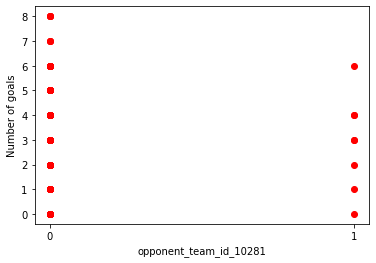

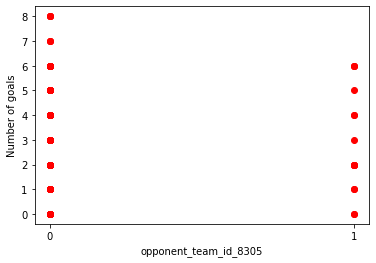

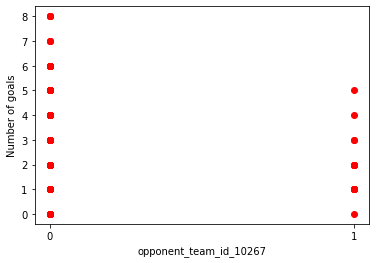

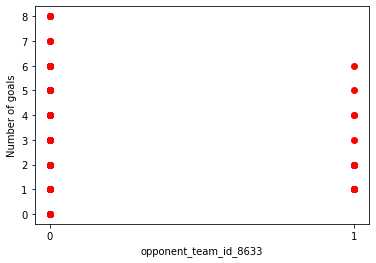

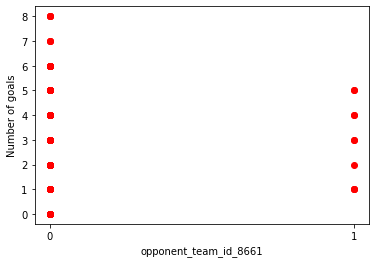

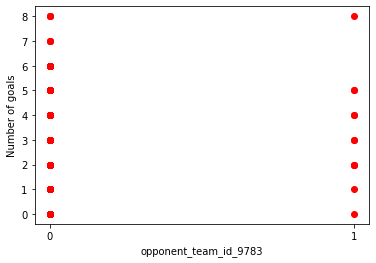

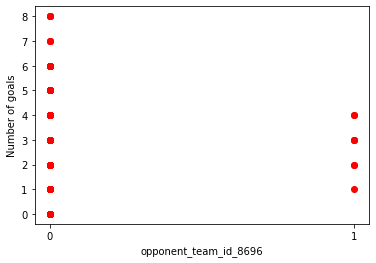

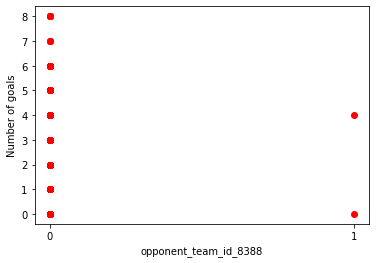

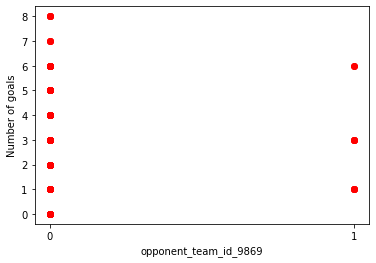

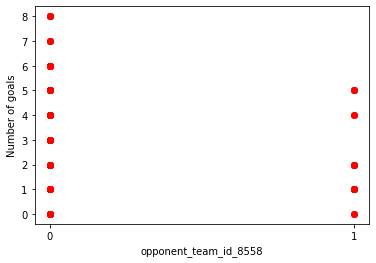

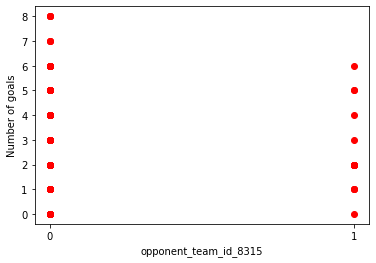

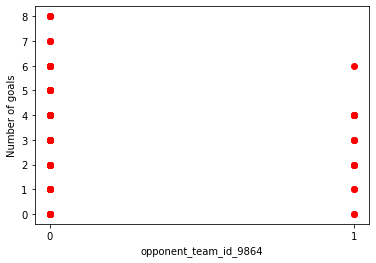

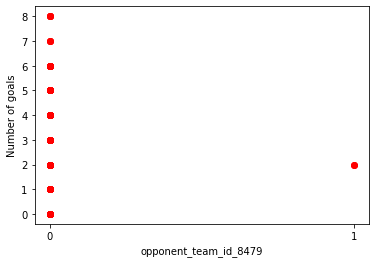

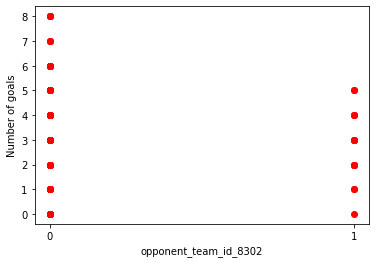

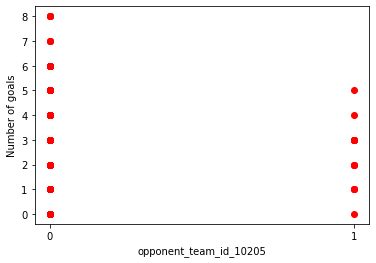

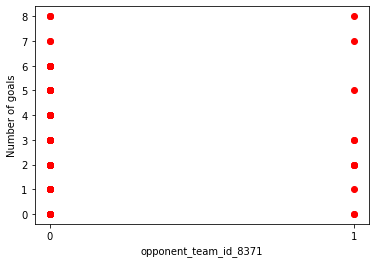

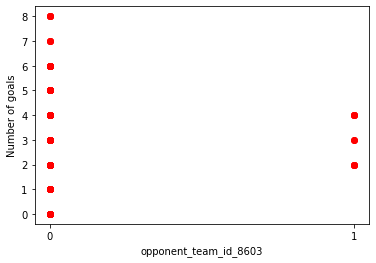

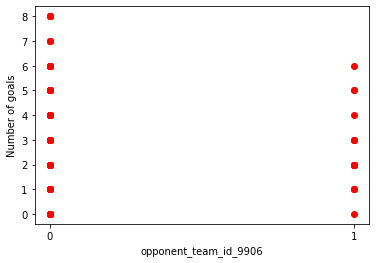

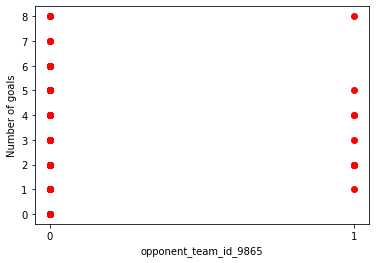

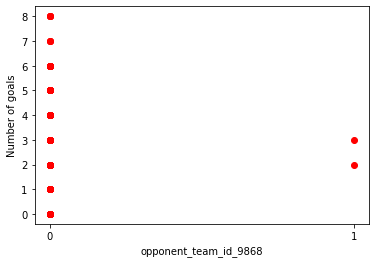

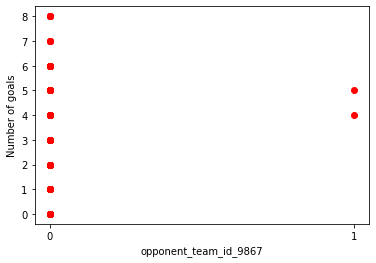

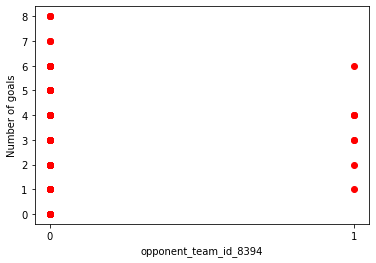

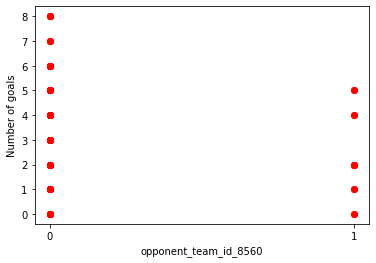

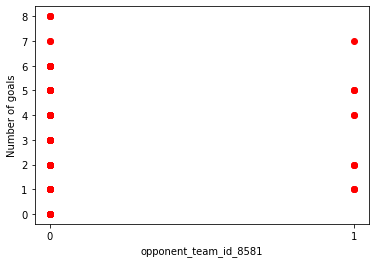

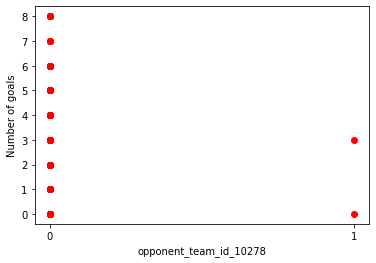

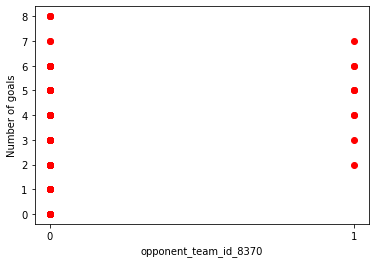

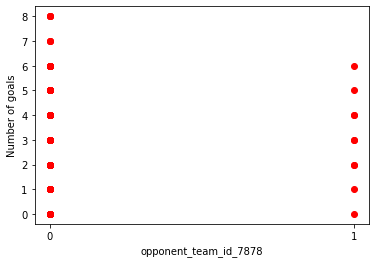

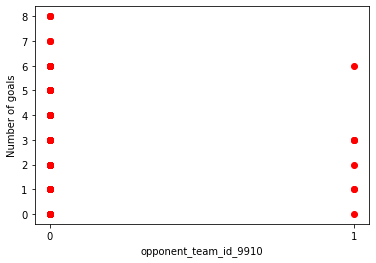

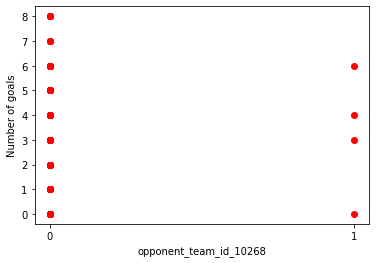

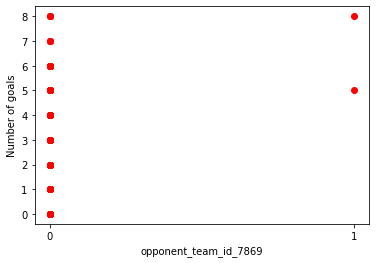

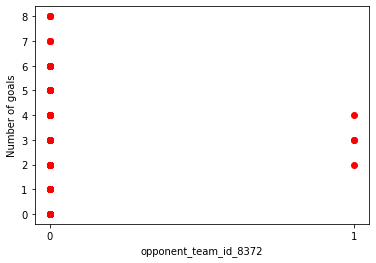

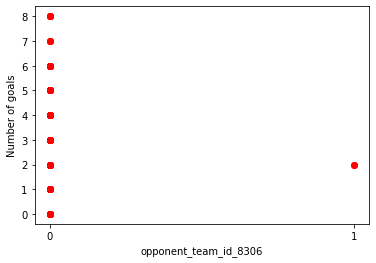

In [99]:
for column in encoded_categorical_columns_df.columns :
    if(re.match("opponent.*", column)):
        plt.plot(all_matches_df_v2[column], all_matches_df_v2["barca_goals"], "ro")
        plt.ylabel('Number of goals')
        plt.xticks([0,1])
        plt.xlabel(column)
        plt.show()

<br>
<br>

# Now we need to explore the data of version 2

1. We figure out the player attributes' correlation with our goal attribute which is the number of goals.
2. We figure out the opponents attributes' correlation with our goal attribute which is the number of goals.
<br>
<br>

In [117]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

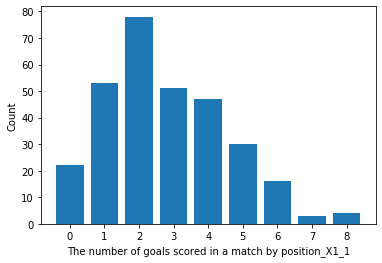

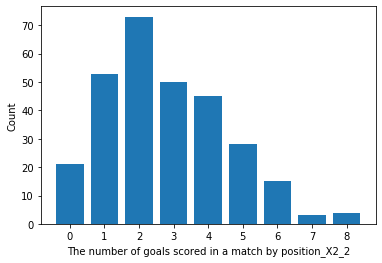

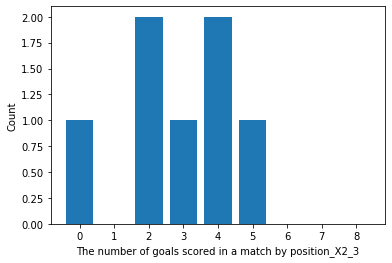

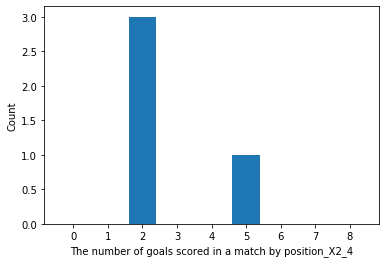

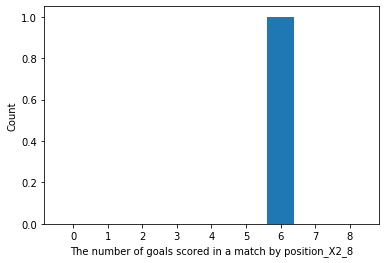

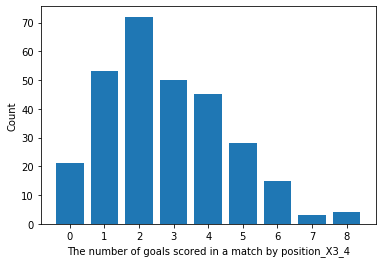

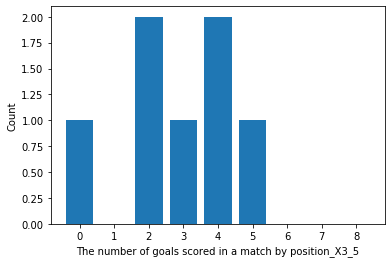

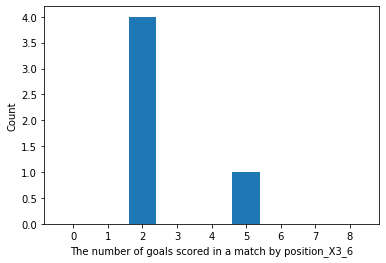

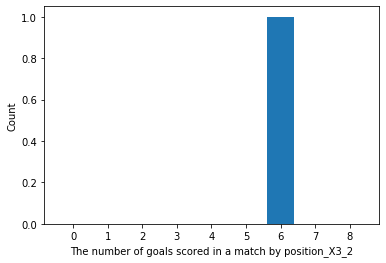

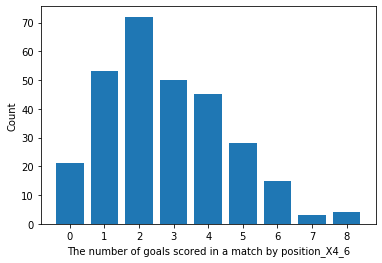

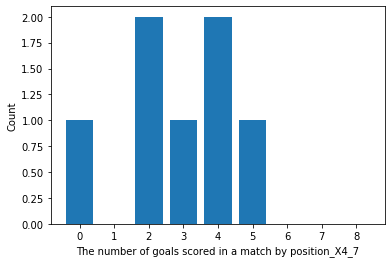

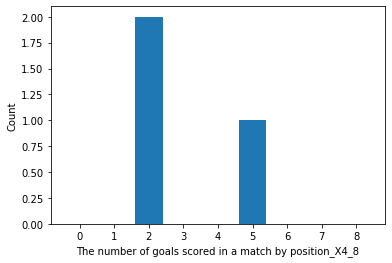

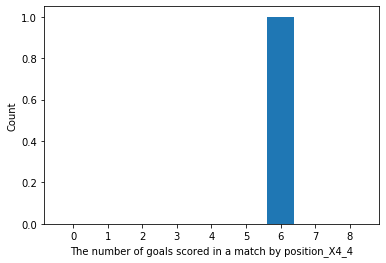

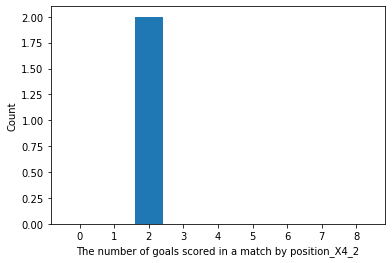

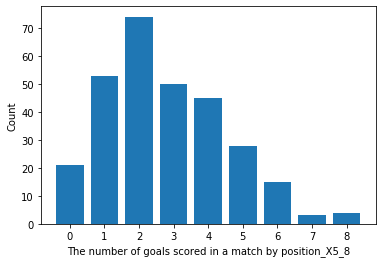

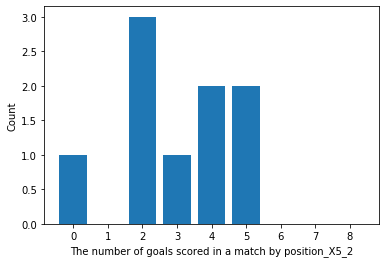

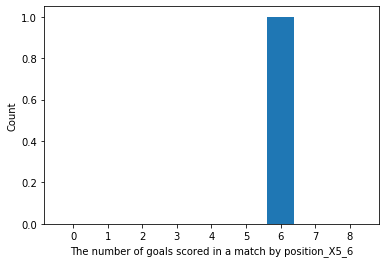

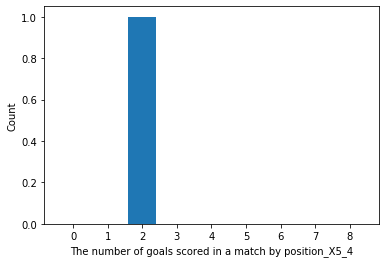

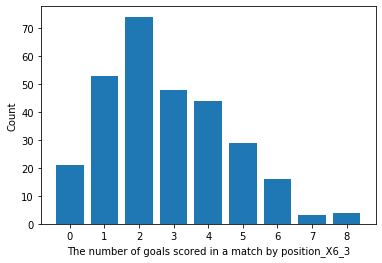

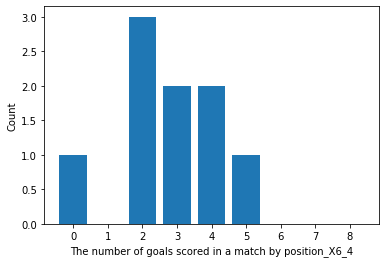

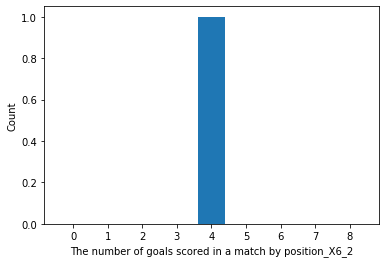

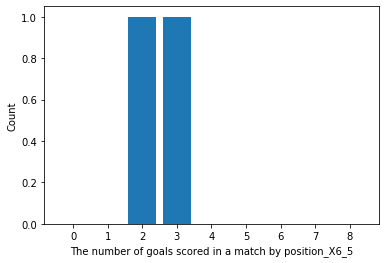

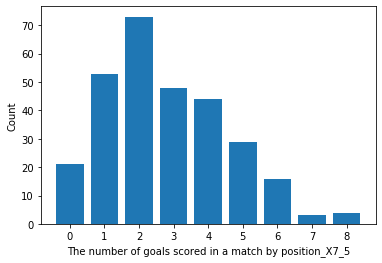

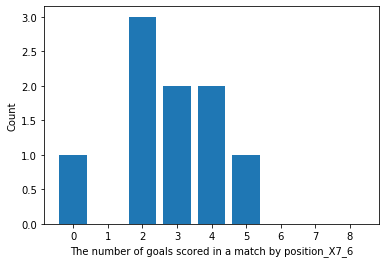

In [ ]:
for column in encoded_categorical_columns_df.columns :
    if(re.match("position.*", column)):
        dict_goals = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
        
        for index, row in all_matches_df_v2.iterrows():
            if(row[column] != 1):
                continue
                
            dict_goals[row["barca_goals"]] = dict_goals[row["barca_goals"]]+1;
          
        plt.bar(range(len(dict_goals)), list(dict_goals.values()), align='center')
        plt.xticks(range(len(dict_goals)), list(dict_goals.keys()))
        plt.xlabel("The number of goals scored in a match by " + column)
        plt.ylabel("Count")
        plt.show()

# It turns out there are columns that hold no data. For player columns these are the players that always play no matter what the number of goals is. For opponents, these are teams that barca has scored all number of goals in. These columns in a match hold no important data. We have to remove these columns.

In [52]:
import pandasql as ps

In [53]:
# First, get the unique number of goals
query_max_goals = "Select count (distinct barca_goals) from all_matches_df_v1"
query_max_goals_df = ps.sqldf(query_max_goals, locals())
max_goals = query_max_goals_df["count (distinct barca_goals)"][0]

# For all columns
for column in encoded_categorical_columns_df.columns :
    
    # This part of the code takes care of the first set of data, which only includes opponent data.
    if(re.match("opponent.*", column)):
        query1 = "Select count (distinct barca_goals) from all_matches_df_v1 where " + column + " = 1"  ;
        query1_df = ps.sqldf(query1, locals())
        goals = query1_df["count (distinct barca_goals)"][0]
        # If the existence of an opponent doesn't indicate anything proprietary, then drop the opponent
        if(goals == max_goals):
            print("Column " + column + " removed due to lack of any correlation.")
            all_matches_df_v1 = all_matches_df_v1.drop([column], axis = 1)
    
    # this part of the code takes care of the second set of data, which also has player information.
    query2 = "Select count (distinct barca_goals) from all_matches_df_v2 where " + column + " = 1"  ;
    query2_df = ps.sqldf(query2, locals())
    goals = query2_df["count (distinct barca_goals)"][0]
    # If the existence of a player or an opponent doesn't indicate anything proprietary, then drop the opponent
    if(goals == max_goals):
        print("Column " + column + " removed due to lack of any correlation.")
        all_matches_df_v2 = all_matches_df_v2.drop([column], axis = 1)

Column position_X1_1 removed due to lack of any correlation.
Column position_X2_2 removed due to lack of any correlation.
Column position_X3_4 removed due to lack of any correlation.
Column position_X4_6 removed due to lack of any correlation.
Column position_X5_8 removed due to lack of any correlation.
Column position_X6_3 removed due to lack of any correlation.
Column position_X7_5 removed due to lack of any correlation.
Column position_X8_7 removed due to lack of any correlation.
Column position_X9_3 removed due to lack of any correlation.
Column position_X10_5 removed due to lack of any correlation.
Column position_X11_7 removed due to lack of any correlation.


In [54]:
all_matches_df_v1.head()

,date,barca_goals,home_away,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,...,opponent_team_id_8560,opponent_team_id_8581,opponent_team_id_10278,opponent_team_id_8370,opponent_team_id_7878,opponent_team_id_9910,opponent_team_id_10268,opponent_team_id_7869,opponent_team_id_8372,opponent_team_id_8306
0,0,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
all_matches_df_v2.head()

,date,barca_goals,home_away,opponent_team_id_10281,opponent_team_id_8305,opponent_team_id_10267,opponent_team_id_8633,opponent_team_id_8661,opponent_team_id_9783,opponent_team_id_8696,...,position_X9_5,position_X9_4,position_X9_6,position_X10_4,position_X10_7,position_X10_6,position_X10_8,position_X11_6,position_X11_5,position_X11_3
0,0,6,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>
<br>

# Now lets create a training set and a test set for each dataset

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# First split data into X (inputs) and Y (outputs)
X1 = all_matches_df_v1.drop(["barca_goals"], axis = 1)
X2 = all_matches_df_v2.drop(["barca_goals"], axis = 1)

# The output for bot datasets are the same so we get it from any of both sets
y1 = all_matches_df_v1["barca_goals"]
y2 = all_matches_df_v2["barca_goals"]

# splitting the first dataset
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1,y1,stratify=y1,train_size=0.8,test_size=0.2,random_state = 0)
# splitting the second dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2,y2,stratify=y2,train_size=0.8,test_size=0.2,random_state = 0)

<br>
<br>

# Now we try the linear regression model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
LR1 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
LR1.fit(X_train_1, y_train_1)

LR2 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
LR2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Get predictions and approximate values

predictions_1 = LR1.predict(X_test_1)
predictions_2 = LR2.predict(X_test_2)

# approximate values for each prediction set
for i in range(predictions_1.size) :
    prediction = predictions_1[i]
    
    if(prediction < 0):
        predictions_1[i] = 0
        continue
    if(prediction > 8):
        predictions_1[i] = 8
        continue
        
    decimal = prediction % 1
    
    if(decimal >= 0.5):
        predictions_1[i] = prediction + 1 - decimal
    else :
        predictions_1[i] -= decimal

for i in range(predictions_2.size) :
    prediction = predictions_2[i]
    
    if(prediction < 0):
        predictions_2[i] = 0
        continue
    if(prediction > 8):
        predictions_2[i] = 8
        continue
    
    decimal = prediction % 1
    
    if(decimal >= 0.5):
        predictions_2[i] = prediction + 1 - decimal
    else :
        predictions_2[i] -= decimal
        

# Accuracy when considered correct if the number of goals is within the range of correct answer +1 and correct answer -1
accuracy_1 = sum(np.absolute(predictions_1 - y_test_1) <= 1) / y_test_1.size
accuracy_2 = sum(np.absolute(predictions_2 - y_test_2) <= 1) / y_test_2.size

print("Predictions when considered correct if the number of goals is within the range of correct answer +1 and correct answer -1")
print("Linear Regression accuracy without information about players : " + str(accuracy_1))
print("Linear Regression accuracy with information about players : " + str(accuracy_2))

print("\n")

# Predictions when considered correct if the number of goals is exactly the correct answer
accuracy_1 = sum((predictions_1 - y_test_1) == 0) / y_test_1.size
accuracy_2 = sum((predictions_2 - y_test_2) == 0) / y_test_2.size
print("Predictions when considered correct if the number of goals is exactly the correct answer")
print("Linear Regression accuracy without information about players : " + str(accuracy_1))
print("Linear Regression accuracy with information about players : " + str(accuracy_2))

Predictions when considered correct if the number of goals is within the range of correct answer +1 and correct answer -1
Linear Regression accuracy without information about players : 0.4918032786885246
Linear Regression accuracy with information about players : 0.47540983606557374


Predictions when considered correct if the number of goals is exactly the correct answer
Linear Regression accuracy without information about players : 0.22950819672131148
Linear Regression accuracy with information about players : 0.2459016393442623


# Now calculate the score for both models